In [2]:
import numpy
import matplotlib.pyplot as pyplot
import time
%matplotlib inline

As a first exercise, we'll solve the 1D linear convection equation with a *square wave* initial condition, defined as follows:

$$
\begin{equation}
u(x,0)=\begin{cases}2 & \text{where } 0.5\leq x \leq 1,\\
1 & \text{everywhere else in } (0, 2)
\end{cases}
\end{equation}
$$

We also need a boundary condition on $x$: let $u=1$ at $x=0$. Our spatial domain for the numerical solution will only cover the range $x\in (0, 2)$.

![squarewave](figures/squarewave.png)

In [3]:
#Setting initial conditions

nx = 101  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 81 #number of time steps
dt = 0.02  # time-step size
c = 1.0  # convection speed

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

In [4]:
#set initial condititions with 1.0 at all x-points (for now)
u0 = numpy.ones(nx)
#locate points where u is 2
#numpy.where to find the indices of those points
mask = numpy.where(numpy.logical_and(x>=0.5, x<=1.0)) #numpy_logical_and acts as an and condition enabler.
print(mask)

(array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50], dtype=int64),)


In [5]:
# Set initial condition u = 2.0 where 0.5 <= x <= 1.0.
u0[mask] = 2.0
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


the plot below represents the initial condition, i.e. u(x, t=0), here u @ t=0 can be a function of x. 

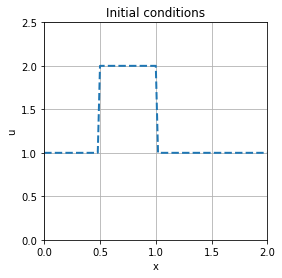

In [6]:
# Plot the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

For every element of our array `u`, we need to perform the operation: 

$$
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
$$

We'll store the result in a new (temporary) array `un`, which will be the solution $u$ for the next time-step.  We will repeat this operation for as many time-steps as we specify and then we can see how far the wave has traveled.  

 un act as a temporary storage for u values at each iteration of temporal point. It keeps on changing till the last temporal point is reached. 

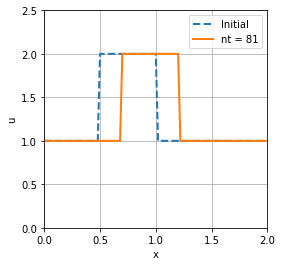

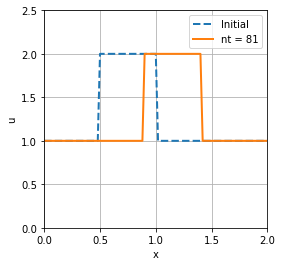

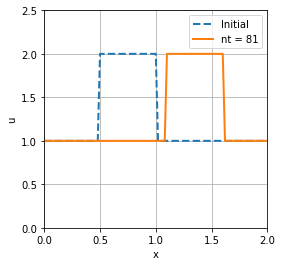

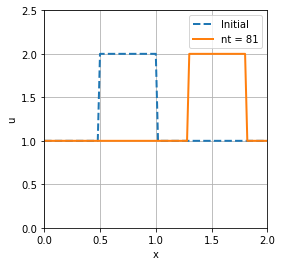

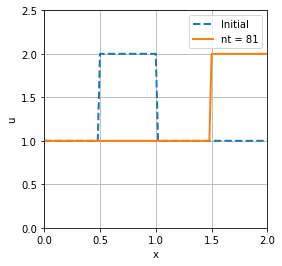

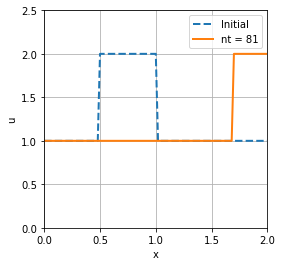

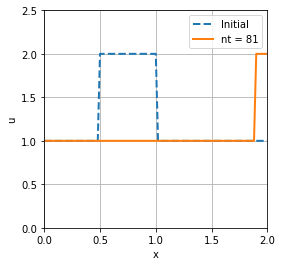

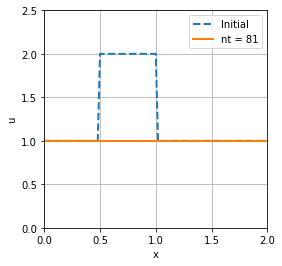

In [7]:
u = u0.copy()

for n in range(1, nt):
    #to know why range starts from 1, refer the block
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])
    if n%10 == 0:
        pyplot.figure(figsize=(4.0, 4.0))
        pyplot.xlabel('x')
        pyplot.ylabel('u')
        pyplot.grid()
        pyplot.plot(x, u0, label='Initial',
                    color='C0', linestyle='--', linewidth=2)
        pyplot.plot(x, u, label='nt = {}'.format(nt),
                    color='C1', linestyle='-', linewidth=2)
        pyplot.legend()
        pyplot.xlim(0.0, L)
        pyplot.ylim(0.0, 2.5);

**Note 1**—We stressed above that our physical problem needs a boundary condition at $x=0$. Here we do not need to impose it at every iteration because our discretization does not change the value of u[0]: it remains equal to one and our boundary condition is therefore satisfied during the whole computation!

**Note 1 is the reason why range for both for loops in above block starts with 1. We do not need to start with zero, because our discretization method doesn't alter the initial condition at u[0]**

**Note 2**—We will learn later that the code as written above is quite inefficient, and there are better ways to write this, Python-style. But let's carry on.


Let's move on to the non-linear convection equation, using the same methods as before. The 1-D convection equation is:

$$
\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
\end{equation}
$$

We're going to use the same discretization as for linear convection: forward difference in time and backward difference in space. Here is the discretized equation:

$$
\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0
\end{equation}
$$

Solving for the only unknown term, $u_i^{n+1}$, gives an equation that can be used to advance in time:

$$
\begin{equation}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)
\end{equation}
$$



this block explains the numpy approach in the next block for implementing the discretized method with numpy and eliminating the use of for loops. It is also valid for u(i) - u(i -2) case, only need to change slices to a[2:] and a[:-2]

In [8]:
a = numpy.array([1, 3, 9, 5, 2, 18])
print(a[1:], "\n", a[:-1], "\n")

b = a[1:]
c = a[:-1]

d = b - c
print(d)

[ 3  9  5  2 18] 
 [1 3 9 5 2] 

[ 2  6 -4 -3 16]


Here is a helpful sketch, to illustrate the array operation—also called a "vectorized" operation—for $u_i-u_{i-1}$.

![vectorizedstencil](figures/vectorizedstencil.png)

In [9]:
# Set parameters.
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 41  # number of time steps
dt = 0.02  # time-step size

x = numpy.linspace(0.0, L, num=nx)
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

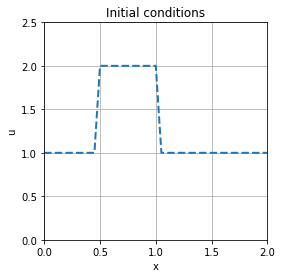

In [10]:
# Plot the initial conditions.

pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

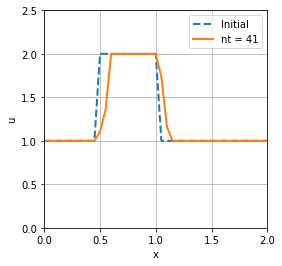

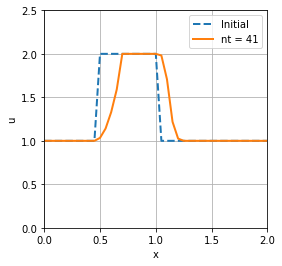

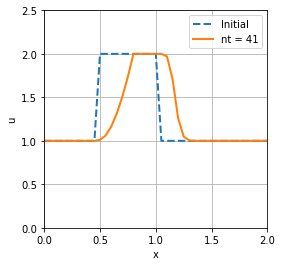

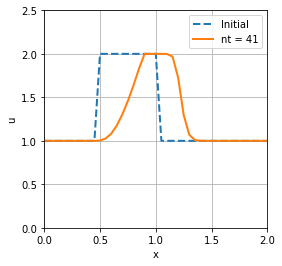

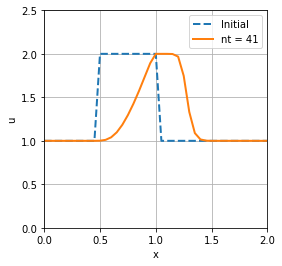

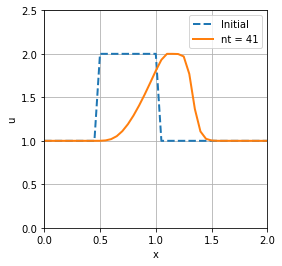

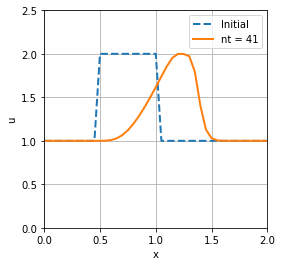

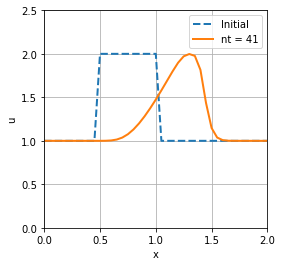

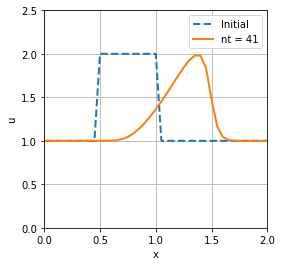

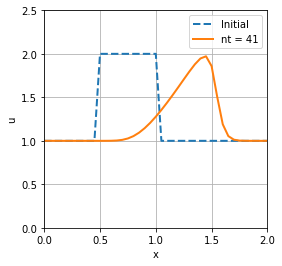

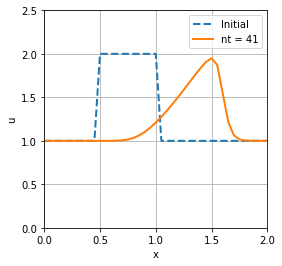

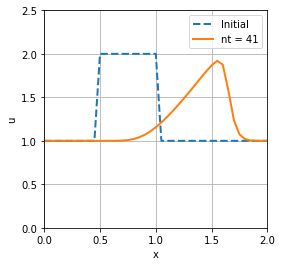

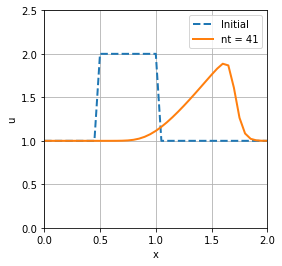

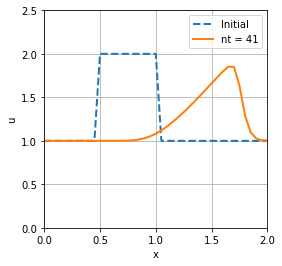

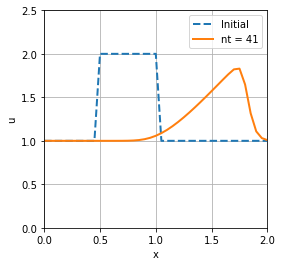

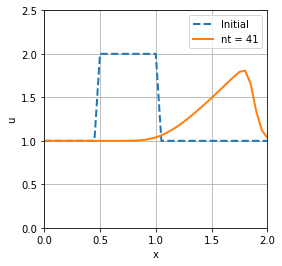

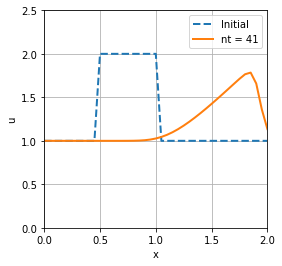

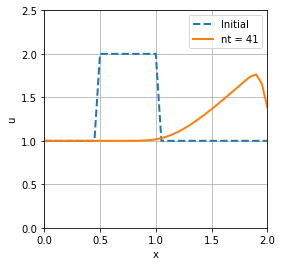

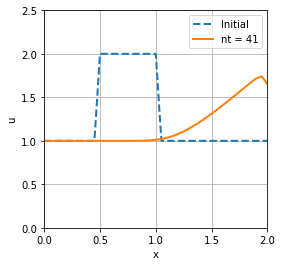

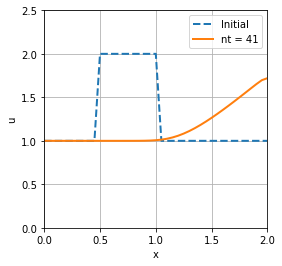

In [11]:
# Compute the solution using Euler's method and array slicing.
u = u0.copy()
for n in range(1, nt):
    u[1:] = u[1:] - dt / dx * u[1:] * (u[1:] - u[:-1])
    if n%2 == 0:
        # Plot the solution after nt time steps
        # along with the initial conditions.
        pyplot.figure(figsize=(4.0, 4.0))
        pyplot.xlabel('x')
        pyplot.ylabel('u')
        pyplot.grid()
        pyplot.plot(x, u0, label='Initial', color='C0', linestyle='--', linewidth=2)
        pyplot.plot(x, u, label='nt = {}'.format(nt), color='C1', linestyle='-', linewidth=2)
        pyplot.legend()
        pyplot.xlim(0.0, L)
        pyplot.ylim(0.0, 2.5);

Hmm. That's quite interesting: like in the linear case, we see that we have lost the sharp sides of our initial square wave, but there's more. Now, the wave has also lost symmetry! It seems to be lagging on the rear side, while the front of the wave is steepening. Is this another form of numerical error, do you ask? No! It's physics!

Think about the effect of having replaced the constant wave speed $c$ by the variable speed given by the solution $u$. It means that different parts of the wave move at different speeds. Make a sketch of an initial wave and think about where the speed is higher and where it is lower ...

In [12]:
def linear_convection(nx, L=2.0, c=1.0, dt=0.025, nt=40):
    """
    Solves the 1D linear convection equation
    with constant speed c in the domain [0, L]
    and plots the solution (along with the initial conditions).

    Parameters
    ----------
    nx : integer
        Number of grid points to discretize the domain.
    L : float, optional
        Length of the domain; default: 2.0.
    c : float, optional
        Convection speed; default: 1.0.
    dt : float, optional
        Time-step size; default: 0.025.
    nt : integer, optional
        Number of time steps to compute; default: 20.
    """
    # Discretize spatial grid.
    dx = L / (nx - 1)
    x = numpy.linspace(0.0, L, num=nx)
    # Set initial conditions.
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    # Integrate the solution in time.
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    # Plot the solution along with the initial conditions.
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);

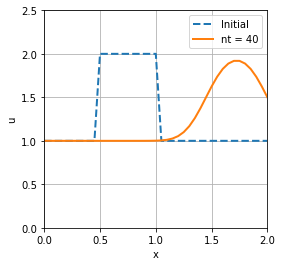

In [13]:
linear_convection(41)

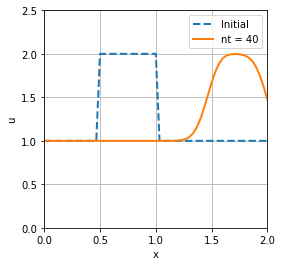

In [14]:
linear_convection(61)

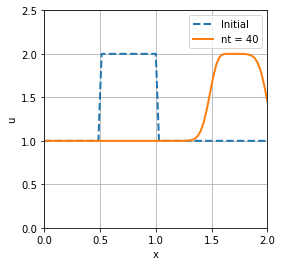

In [15]:
linear_convection(71)

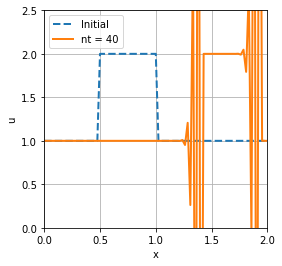

In [16]:
linear_convection(85)

### CFL Condition

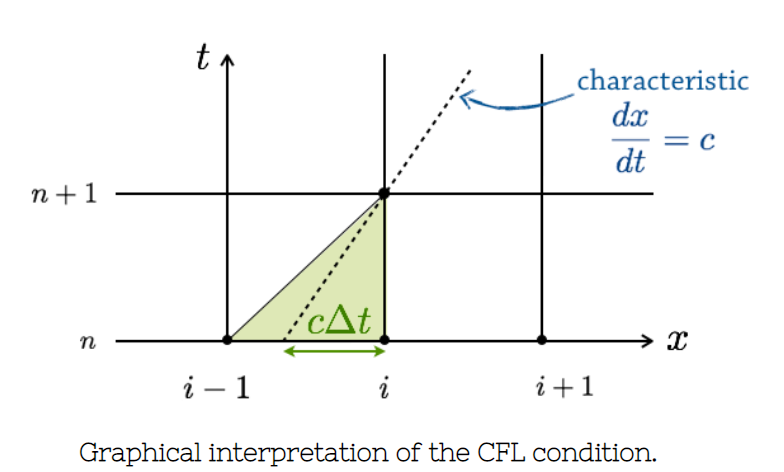



Consider the illustration above. The green triangle represents the _domain of dependence_ of the numerical scheme. Indeed, for each time step, the variable $u_i^{n+1}$ only depends on the values $u_i^{n}$ and $u_{i-1}^{n}$. 

When the distance $c\Delta t$ is smaller than $\Delta x$, the characteristic line traced from the grid coordinate $i, n+1$ lands _between_ the points $i-1,n$ and $i,n$ on the grid. We then say that the _mathematical domain of dependence_ of the solution of the original PDE is contained in the _domain of dependence_ of the numerical scheme. 

On the contrary, if $\Delta x$ is smaller than $c\Delta t$, then the information about the solution needed for $u_i^{n+1}$ is not available in the _domain of dependence_ of the numerical scheme, because the characteristic line traced from the grid coordinate $i, n+1$ lands _behind_ the point $i-1,n$ on the grid. 

The following condition thus ensures that the domain of dependence of the differential equation is contained in the _numerical_ domain of dependence: 

$$
\begin{equation}
\sigma = \frac{c \Delta t}{\Delta x} \leq 1
\end{equation}
$$

As can be proven formally, stability of the numerical solution requires that step size `dt` is calculated with respect to the size of `dx` to satisfy the condition above.  

The value of $c\Delta t/\Delta x$ is called the **Courant-Friedrichs-Lewy number** (CFL number), often denoted by $\sigma$. The value $\sigma_{\text{max}}$ that will ensure stability depends on the discretization used; for the forward-time/backward-space scheme, the condition for stability is $\sigma<1$.

In a new version of our code—written _defensively_—, we'll use the CFL number to calculate the appropriate time-step `dt` depending on the size of `dx`.  
 

In [17]:
def linear_convection_cfl(nx, L=2.0, c=1.0, sigma=0.5, nt=240):
    """
    Solves the 1D linear convection equation
    with constant speed c in the domain [0, L]
    and plots the solution (along with the initial conditions).
    Here, the time-step size is calculated based on a CFL constraint.

    Parameters
    ----------
    nx : integer
        Number of grid points to discretize the domain.
    L : float, optional
        Length of the domain; default: 2.0.
    c : float, optional
        Convection speed; default: 1.0.
    sigma : float, optional
        CFL constraint; default: 0.5.
    dt : float, optional
        Time-step size; default: 0.025.
    nt : integer, optional
        Number of time steps to compute; default: 20.
    """
    # Discretize spatial grid.
    dx = L / (nx - 1)
    x = numpy.linspace(0.0, L, num=nx)
    # Compute the time-step size based on the CFL constraint.
    dt = sigma * dx / c
    # Set initial conditions.
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    # Integrate the solution in time.
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    # Plot the solution along with the initial conditions.
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);

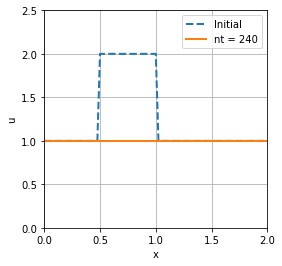

In [18]:
linear_convection_cfl(85)

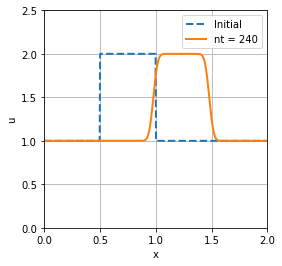

In [19]:
linear_convection_cfl(500)